(404, 13)
(102, 13)
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2 18.6 14.5 17.8 50.
 20.8 24.3 24.2 19.8 19.1 22.7 12.  10.2 20.  18.5 20.9 23.  27.5 30.1
  9.5 22.  21.2 14.1 33.1 23.4 20.1  7.4 15.4 23.8 20.1 24.5 33.  28.4
 14.1 46.7 32.5 29.6 28.4 19.8 20.2 25.  35.4 20.3  9.7 14.5 34.9 26.6
  7.2 50.  32.4 21.6 29.8 13.1 27.5 21.2 23.1 21.9 13.  23.2  8.1  5.6
 21.7 29.6 19.6  7.  26.4 18.9 20.9 28.1 35.4 10.2 24.3 43.1 17.6 15.4
 16.2 27.1 21.4 21.5 22.4 25.  16.6 18.6 22.  42.8 35.1 21.5 36.  21.9
 24.1 50.  26.7 25. ]
processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.570512115955353
14.260392665863037


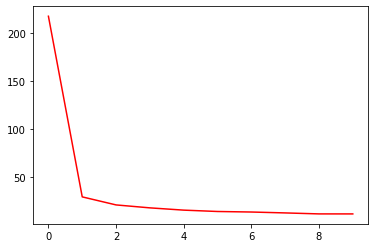

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.5580939054489136
13.159731149673462


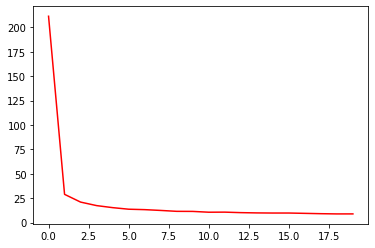

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.346088021993637
11.866212844848633


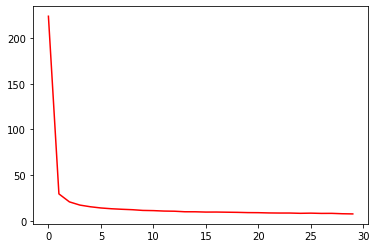

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.3796162009239197
11.640920400619507


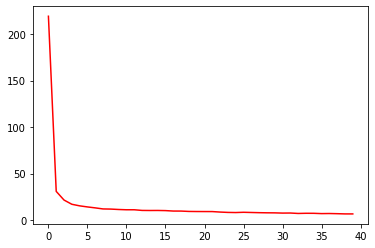

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.4496235847473145
11.820494651794434


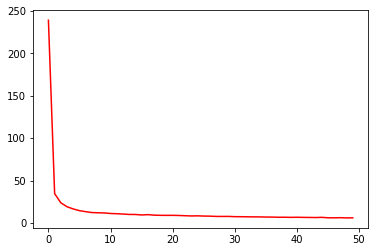

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.4486716985702515
11.639322519302368


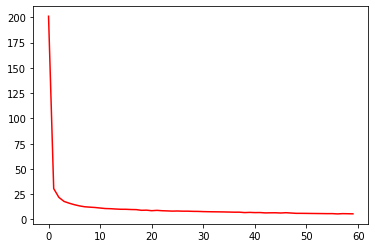

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.6903520822525024
14.188614130020142


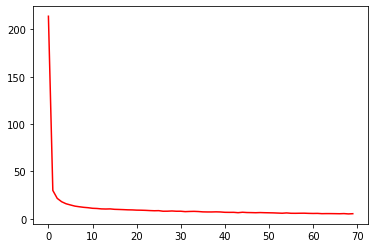

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.3271289467811584
11.03393292427063


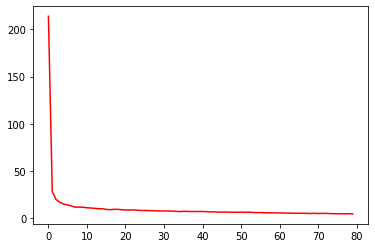

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.5231181979179382
12.75275707244873


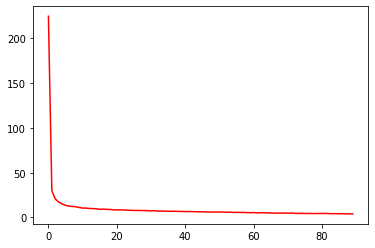

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.3021970987319946
11.301158428192139


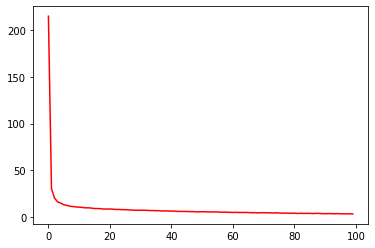

'\nВопрос 1:\nКлассификация - это предсказание метки или категории.\n\nАлгоритм классификации классифицирует требуемый набор данных в одну из двух или более меток\nРегрессия - это поиск оптимальной функции для определения данных о непрерывных реальных значениях и прогнозирования этой величины.\n\nТо есть, если классификация относит объект к какому-то либо классу, то регрессия выдает оптимальную функцию, для прогнозирования значений\n\nнапример классификация:\nбудет ли завтра (солнце дождь или снег)\n\nрегрессия:\nпрогнозирование цены акций ( в зависимости от каких-то внешних данных)\n\n'

In [9]:
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import boston_housing
import matplotlib.pyplot as plt


(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
print(train_data.shape)  # размерность входного обучающего массива
print(test_data.shape)  # размерность тестового массива
print(test_targets)  # выходные данные для тестов

mean = train_data.mean(axis=0)  # среднее значение
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std
"""
нормализация данных

Исходные значения признаков могут изменяться в очень большом диапазоне и отличаться друг от друга на несколько порядков.
Данные сильно различаются между собой по абсолютным величинам.
Работа аналитических моделей машинного обучения с такими показателями окажется некорректной:
дисбаланс между значениями признаков может вызвать неустойчивость работы модели, ухудшить результаты обучения и замедлить процесс моделирования.

"""


def build_model():
    model = Sequential()  # модель где каждый слой имеет 1 входной и выходной тензор
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) # создание модели
    return model

num_epochs = 10
for j in range(10):
    k = 4  # делим данные на блоки, так как их мало
    num_val_samples = len(train_data) // k
    all_scores = []
    all_scores_1 = []
    data_mse = []
    for i in range(k):
        print('processing fold #', i)
        val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]  # тут просто берутся диапазоны данных для обучения модели
        val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
        partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
        partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)

        model = build_model()
        data0 = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
        val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)  # проводим оценку модели

        all_scores.append(val_mae)  # записываем точность
        all_scores_1.append(val_mse)

        dat0_mse = data0.history['loss']
        data_mse.append(dat0_mse)  # записываем ошибку в список
    num_epochs += 10


    mae0 = np.mean(all_scores)
    print(mae0)  # нормализуем значения точности
    # plt.plot(all_scores, color='blue')
    # plt.show()
    mse0 = np.mean(all_scores_1)
    print(mse0)  # нормализуем значения ошибки

    mse_res = [] # вывожу средний график ошибки
    for i in range(len(data_mse[0])):
        mse_res.append((data_mse[0][i] + data_mse[1][i] + data_mse[2][i])/3)
    plt.plot(mse_res, color='red')
    plt.show()
"""
Вопрос 1:
Классификация - это предсказание метки или категории.

Алгоритм классификации классифицирует требуемый набор данных в одну из двух или более меток
Регрессия - это поиск оптимальной функции для определения данных о непрерывных реальных значениях и прогнозирования этой величины.

То есть, если классификация относит объект к какому-то либо классу, то регрессия выдает оптимальную функцию, для прогнозирования значений

например классификация:
будет ли завтра (солнце дождь или снег)

регрессия:
прогнозирование цены акций ( в зависимости от каких-то внешних данных)

"""


Исходя из данных, по ошибке - точка переобучения модели находится между 30 и 50 эпохами

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
2.2703460454940796
11.128908348083495


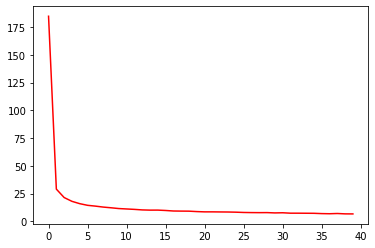

In [10]:
num_epochs = 40
k = 5
num_val_samples = len(train_data) // k
all_scores = []
all_scores_1 = []
data_mse = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = build_model()
    data0 = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    all_scores_1.append(val_mse)

    dat0_mse = data0.history['loss']
    data_mse.append(dat0_mse)

mae0 = np.mean(all_scores)
print(mae0)
mse0 = np.mean(all_scores_1)
print(mse0)

mse_res = []
for i in range(len(data_mse[0])):
    mse_res.append((data_mse[0][i] + data_mse[1][i] + data_mse[2][i])/3)
plt.plot(mse_res, color='red')
plt.show()

тут я заменил количество блоков с 4 на 5